# 線形回帰（教師有り学習）

scikit-learnを使って、線形回帰のモデルを作り、新しいデータを使った予測を試る。 
サンプルデータは、アメリカの大都市ボストンの住宅価格。

```
Step 1: データの準備
Step 2: ひとまず可視化
Step 3: 最小二乗法の数学的な背景
Step 4: Numpyを使った単回帰
Step 5: 誤差について
Step 6: scikit-learnを使った重回帰分析
Step 7: 学習（Training）と検証Validation）
Step 8: 価格の予測
Step 9 : 残差プロット
```

## Step 1: データの準備

scikit-learnに用意されているサンプルデータを使う。

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
# 住宅価格サンプルデータのロード
boston = load_boston()

In [12]:
# Descriptionは説明
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
type(boston)

sklearn.datasets.base.Bunch

| 変数 | 内容 |
|---------|----------------------------------------------------------------|
| CRIM    | 人口 1 人当たりの犯罪発生数                                    |
| ZN      | 25,000 平方フィート以上の住居区画の占める割合                  |
| INDUS   | 小売業以外の商業が占める面積の割合                             |
| CHAS    | チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)        |
| NOX     | NOx の濃度                                                     |
| RM      | 住居の平均部屋数                                               |
| AGE     | 1940 年より前に建てられた物件の割合                            |
| DIS     | 5 つのボストン市の雇用施設からの距離 (重み付け済)              |
| RAD     | 環状高速道路へのアクセスしやすさ                               |
| TAX     | $10,000 ドルあたりの不動産税率の総計                           |
| PTRATIO | 町毎の児童と教師の比率                                         |
| B       | 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2 |
| LSTAT   | 給与の低い職業に従事する人口の割合 (%)                         |

In [11]:
pd.DataFrame(boston.data, columns=boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


[参考](http://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88)

-----
## Step 2: ひとまず可視化

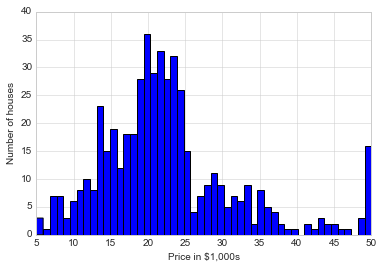

In [13]:
# 価格のヒストグラム（これがモデルを作って、最終的に予測したい値）
plt.hist(boston.target, bins = 50)

plt.xlabel('Price in $1,000s')
plt.ylabel('Number of houses')

今度は散布図を描く。部屋のkザウト価格の関係を見ていく

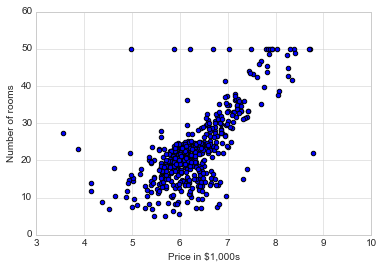

In [17]:
plt.scatter(boston.data[:, 5], boston.target)

plt.xlabel('Price in $1,000s')
plt.ylabel('Number of rooms')

予想通り、部屋数が増えれば価格が上がる。

ここで、pandas.DataFrameとseabornを導入する。

In [19]:
# DataFrameを作る
boston_df = DataFrame(boston.data)

# 列名をつける
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


DataFrameに新しい列を作って、目的変数（価格）を格納しておく。

In [20]:
boston_df['Price'] = boston.target

In [21]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


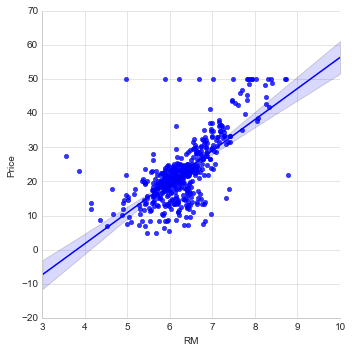

In [22]:
# lmplotを使って、回帰直線を描く
sns.lmplot('RM', 'Price', data = boston_df)

数学的に複雑なモデルが欲しいときはこれでは少し力不足なので、scikit-learnの使い方を学ぶ。

-----
## Step 3: 最小二乗法の数学的な背景

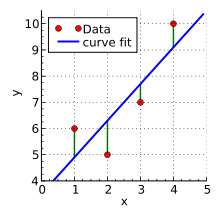

In [23]:
# wikipediaから拝借
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

-----
## Step 4: Numpyを使った単回帰

Numpyは線形代数のライブラリの一部に、最小二乗法を解く関数を持っている。

まずはこれを使って、単回帰(説明変数が1つ）を行う。
その後、scikit-learnを使って、重回帰（説明変数が複数）を行う。

入力として、2つのarray（XとY）を用意する。

* Yは目的変数なので1次元のarrayだが、
* Xは2次元のarrayで、行がサンプル、列が説明変数。

単回帰の場合は列が1つになるので、そのshapeは、(506,1)。
これを作るには、いくつか方法があるが、ここではvstackを使う。

In [33]:
# 部屋数
X = boston_df.RM
print(X.shape)
X
#　これを2次元のarrayにする
X = np.vstack(boston_df.RM)
print(X.shape)

(506,)
(506, 1)


In [30]:
Y = boston_df.Price
print(Y.shape)

(506,)


numpyで単回帰をするには、ここから少しだけ工夫が必要。

直線の式は
\begin{equation*}
y = ax + b
\end{equation*}
これは、次のように書き直すことができる。
\begin{equation*}
y = Ap
\end{equation*}
ただし、
\begin{equation*}
A = 
\begin{bmatrix}
x & 1
\end{bmatrix}
\end{equation*}
\begin{equation*}
p = 
\begin{bmatrix}
a \\
b
\end{bmatrix}
\end{equation*}
Aとpはベクトルで、これらの内積で直線の式を表現しただけ。
データをこの形式に変更する必要があるので、以下のコードを実行する。

In [34]:
# Xを[X 1]の形にする
X = np.array( [ [value,1] for value in X ] )
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [35]:
# 最小二乗法の計算を実行する
a,b = np.linalg.lstsq(X, Y)[0]

求められた直線をプロットする。

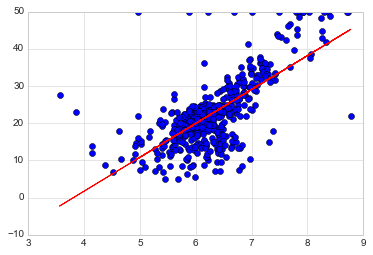

In [36]:
# まずは元のデータをプロットする
plt.plot(boston_df.RM, boston_df.Price, 'o')

# 求めた回帰直線を描く
x = boston_df.RM
plt.plot(x, a * x + b, 'r')

----
## Step5: 誤差について

In [37]:
# 結果のarrayを取得する
result = np.linalg.lstsq(X, Y)

In [41]:
# 2つ目の要素に、誤差の合計が入っている
error_total = result[1]

# 誤差の平均値の平方根を計算する
rmse = np.sqrt(error_total / len(X))

print('平均二乗誤差の平方根は {:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根は 6.60


-----
## Step 6: scikit-learnを使った重回帰分析

sklearn.linear_model.LinearRegressionクラスは、データを元にモデルを作り、予測値を返すことができる。
モデルを作る時には、fit()メソッドを呼び、予測をするときは、predict()メソッドを使う。 
今回は重回帰モデルを使うが、他のモデルも同じように、fitとpredictメソッドを実装しているところが、scikit-learnの便利なところ。

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression

まず、LinearRegressionクラスのインスタンスを作る。

In [44]:
lreg = LinearRegression()

* lreg.fit() ：データを元にモデルを作る
* lreg.predict() ：作られたモデルを元に、予測値を返す
* lreg.score()：決定係数を返す

ボストンの住宅価格を、目的変数と説明変数に分ける。

In [45]:
# 説明変数
X_multi = boston_df.drop('Price',1)

# 目的変数
Y_target = boston_df.Price

In [46]:
# モデルを作る
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print('切片の値は{:0.2f}'.format(lreg.intercept_))

切片の値は36.49


In [48]:
print('係数の数は{}個'.format(len(lreg.coef_)))

係数の数は13個


実際に求められた係数を見ていく。

In [50]:
# 新しいDataFrameを作ります。
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

#求められた係数を代入します。
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


部屋の数（RM）の係数が一番大きいことがわかる。

-----
## Step 7: 学習（Training）と検証（Validation）

一部のデータを使ってモデルを作り、残りのデータを使ってモデルを検証する。

scikit-learnの関数 train_test_splitを用いる。

In [51]:
# 説明変数をX, 目的変数をYとして受け取る
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_multi, boston_df.Price)

In [52]:
# どのように別れたのか確認する
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


-----
## Step 8: 価格の予測

学習用のデータを使ってモデルを作り、残りのデータを使って、住宅価格を予測する。

In [54]:
# インスタンス作成
lreg = LinearRegression()

# fitでモデルを作るが、使うのは学習用のデータのみ
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

予測を学習用のデータとテスト用のデータ、両方でやってみる

In [55]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

それぞれの平均二乗誤差を計算

In [56]:
print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_train - pred_train) ** 2)))
    
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_test - pred_test) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝23.20
X_testを使ったモデルの平均二乗誤差＝19.79


-----
## Step 9 : 残差プロット

回帰分析では、実際に観測された値と、モデルが予測した値の差を、残差と呼ぶ。
```
残差=観測された値−予測された値
```
横軸に予測値、縦軸に実際の値との差をプロットしたもの：残差プロット

残差プロットを描いて、多くのデータがy=0の直線に近いところに集まれば、よいモデルが出来たことがわかる。 
また、均一に点がプロットされている場合、線形回帰が適切だったことがわかる。
そうでは無い場合は、非線形なモデルを使うことを検討する。（これは後のレクチャーで解説。）

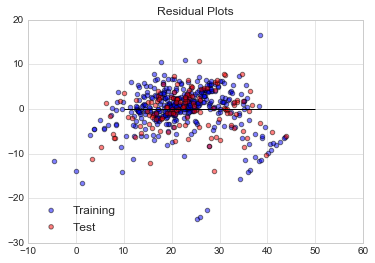

In [58]:
# 学習用のデータの残差プロット
train = plt.scatter(pred_train, (pred_train - Y_train), c = 'b', alpha = 0.5)

# テスト用のデータの残差プロット
test = plt.scatter(pred_test, (pred_test - Y_test), c = 'r', alpha = 0.5)

# y = 0の水平な線を描いておく
plt.hlines(y = 0, xmin = 10, xmax = 50)

plt.legend((train, test), ('Training', 'Test'), loc = 'lower left')
plt.title('Residual Plots')

y=0の回りに、残差がランダムにばらけているように見えますので、モデルは良かったと言えそう。
右下に直線上に並んだデータに関して調べて見るのは、興味深いかもしれない。